# **Speech To Text**

## ESPnet2-ASR realtime demonstration

This notebook provides a demonstration of the realtime E2E-ASR using ESPnet2-ASR.

- ESPnet2-ASR: https://github.com/espnet/espnet/tree/master/egs2/TEMPLATE/asr1

Author: Jiatong Shi ([@ftshijt](https://github.com/ftshijt))

In [ ]:
# NOTE: pip shows imcompatible errors due to preinstalled libraries but you do not need to care
!pip install -q espnet==0.10.0
!pip install -q espnet_model_zoo

### Model Selection

Please select model shown in [espnet_model_zoo](https://github.com/espnet/espnet_model_zoo/blob/master/espnet_model_zoo/table.csv)

In this demonstration, we will show English, Japanese, Spanish, Mandrain, Multilingual ASR model, respectively

In [ ]:
#@title Choose English ASR model { run: "auto" }

lang = 'en'
fs = 16000 #@param {type:"integer"}
tag = 'Shinji Watanabe/spgispeech_asr_train_asr_conformer6_n_fft512_hop_length256_raw_en_unnorm_bpe5000_valid.acc.ave' #@param ["Shinji Watanabe/spgispeech_asr_train_asr_conformer6_n_fft512_hop_length256_raw_en_unnorm_bpe5000_valid.acc.ave", "kamo-naoyuki/librispeech_asr_train_asr_conformer6_n_fft512_hop_length256_raw_en_bpe5000_scheduler_confwarmup_steps40000_optim_conflr0.0025_sp_valid.acc.ave"] {type:"string"}

In [ ]:
#@title Choose Spanish ASR model { run: "auto" }

lang = 'es'
fs = 16000 #@param {type:"integer"}
tag = 'ftshijt/mls_asr_transformer_valid.acc.best' #@param ["ftshijt/mls_asr_transformer_valid.acc.best"] {type:"string"}

In [ ]:
#@title Choose Japanese ASR model { run: "auto" }

lang = 'ja'
fs = 16000 #@param {type:"integer"}
tag = 'Shinji Watanabe/laborotv_asr_train_asr_conformer2_latest33_raw_char_sp_valid.acc.ave' #@param ["Shinji Watanabe/laborotv_asr_train_asr_conformer2_latest33_raw_char_sp_valid.acc.ave"] {type:"string"}

### Model Setup

In [ ]:
import time
import torch
import string
from espnet_model_zoo.downloader import ModelDownloader
from espnet2.bin.asr_inference import Speech2Text


d = ModelDownloader()
# It may takes a while to download and build models
speech2text = Speech2Text(
    **d.download_and_unpack(tag),
    device="cuda",
    minlenratio=0.0,
    maxlenratio=0.0,
    ctc_weight=0.3,
    beam_size=10,
    batch_size=0,
    nbest=1
)

def text_normalizer(text):
    text = text.upper()
    return text.translate(str.maketrans('', '', string.punctuation))

ImportError: ignored

### Recognize your own pre-recordings

1.   Upload your own pre-recorded recordings
2.   Recognize your voice with the ASR system

In [ ]:
from google.colab import files
from IPython.display import display, Audio
import soundfile
import librosa.display
import matplotlib.pyplot as plt

uploaded = files.upload()

for file_name in uploaded.keys():

  speech, rate = librosa.load(file_name, sr=16000)
  assert rate == fs, "mismatch in sampling rate"
  nbests = speech2text(speech)
  text, *_ = nbests[0]

  print(f"Input Speech: {file_name}")
  display(Audio(speech, rate=rate))
  librosa.display.waveplot(speech, sr=rate)
  plt.show()
  print(f"ASR hypothesis: {text_normalizer(text)}")
  print("*" * 50)

# **Translate Text**


In [ ]:
pip install deep-translator

In [ ]:
from deep_translator import GoogleTranslator
to_translate = text_normalizer(text)
translated = GoogleTranslator(source='auto', target='en').translate(to_translate)

print(translated)

# **Voice Cloning**


In [ ]:
# Cloning the repository
!git clone https://github.com/misbah4064/Real-Time-Voice-Cloning.git

Cloning into 'Real-Time-Voice-Cloning'...
remote: Enumerating objects: 2453, done.
remote: Total 2453 (delta 0), reused 0 (delta 0), pack-reused 2453
Receiving objects: 100% (2453/2453), 363.73 MiB | 33.15 MiB/s, done.
Resolving deltas: 100% (1354/1354), done.


In [ ]:
# Changing the current directory to the repository's directory
%cd Real-Time-Voice-Cloning/

/content/Real-Time-Voice-Cloning


In [ ]:
# Installing the dependencies
!pip install -q -r requirements.txt
!apt-get install -qq libportaudio2

     |████████████████████████████████| 109.3 MB 46 kB/s 
     |████████████████████████████████| 88 kB 5.5 MB/s 
     |████████████████████████████████| 676 kB 46.9 MB/s 
     |████████████████████████████████| 235 kB 43.8 MB/s 
     |████████████████████████████████| 8.3 MB 33.8 MB/s 
     |████████████████████████████████| 3.5 MB 36.4 MB/s 
     |████████████████████████████████| 3.1 MB 38.4 MB/s 
     |████████████████████████████████| 488 kB 48.4 MB/s 
     |████████████████████████████████| 50 kB 5.4 MB/s 
     |████████████████████████████████| 20.2 MB 59.3 MB/s 
     |████████████████████████████████| 86 kB 5.4 MB/s 
     |████████████████████████████████| 80 kB 8.3 MB/s 
     |████████████████████████████████| 81 kB 8.1 MB/s 
     |████████████████████████████████| 69 kB 6.5 MB/s 
     |████████████████████████████████| 54 kB 2.3 MB/s 
     |████████████████████████████████| 59.9 MB 1.3 MB/s 
     |████████████████████████████████| 338 kB 42.0 MB/s 
ERROR: pip's dependency res

In [ ]:
# Downloading pretrained data and unzipping it
!gdown https://drive.google.com/uc?id=1n1sPXvT34yXFLT47QZA6FIRGrwMeSsZc
!unzip pretrained.zip

Downloading...
From: https://drive.google.com/uc?id=1n1sPXvT34yXFLT47QZA6FIRGrwMeSsZc
To: /content/Real-Time-Voice-Cloning/pretrained.zip
100% 384M/384M [00:01<00:00, 227MB/s]
Archive:  pretrained.zip
   creating: encoder/saved_models/
  inflating: encoder/saved_models/pretrained.pt  
   creating: synthesizer/saved_models/
   creating: synthesizer/saved_models/logs-pretrained/
   creating: synthesizer/saved_models/logs-pretrained/taco_pretrained/
 extracting: synthesizer/saved_models/logs-pretrained/taco_pretrained/checkpoint  
  inflating: synthesizer/saved_models/logs-pretrained/taco_pretrained/tacotron_model.ckpt-278000.data-00000-of-00001  
  inflating: synthesizer/saved_models/logs-pretrained/taco_pretrained/tacotron_model.ckpt-278000.index  
  inflating: synthesizer/saved_models/logs-pretrained/taco_pretrained/tacotron_model.ckpt-278000.meta  
   creating: vocoder/saved_models/
   creating: vocoder/saved_models/pretrained/
  inflating: vocoder/saved_models/pretrained/pretrained.p

# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive"

Mounted at /content/drive
 ArASL_Database_54K_Final.zip   Dice.rar
 ArSL_Data_Labels.csv	       'Igo 2014 map free download (تمت استعادته).gdoc'
 asem.asm		       'Mobile software version .gform'
 Asem_TrainingForm.pdf	        PreTraindModel
 Backlog2.xlsx		        q1.asm
 Classroom		        SignLanguage
'Colab Notebooks'	       '+Voice Cloning.ipynb'
'Coursera F7GMTJJS3647.pdf'    'نسخة من Mobile software version .gform'
 Cuby-armv7.apk		       'نموذج بدون عنوان.gform'
 demo.ipynb


In [ ]:
# Initializing all the encoder libraries
from IPython.display import Audio
from IPython.utils import io
from synthesizer.inference import Synthesizer
from encoder import inference as encoder
from vocoder import inference as vocoder
from pathlib import Path
import numpy as np
import librosa
##"synthesizer/saved_models/logs-pretrained/taco_pretrained
encoder_weights = Path("/content/drive/MyDrive/PreTraindModel/encoder/saved_models/pretrained.pt")
vocoder_weights = Path("/content/drive/MyDrive/PreTraindModel/vocoder/saved_models/pretrained/pretrained.pt")
syn_dir = Path("/content/drive/MyDrive/PreTraindModel/synthesizer/saved_models/logs-pretrained/taco_pretrained")
encoder.load_model(encoder_weights)
vocoder.load_model(vocoder_weights)
synthesizer = Synthesizer(syn_dir)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

Loaded encoder "pretrained.pt" trained to step 1564501
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at /content/drive/MyDrive/PreTraindModel/vocoder/saved_models/pretrained/pretrained.pt
Found synthesizer "pretrained" trained to step 278000


In [ ]:
text = "Hello Asem,   I love you and love your work,  Keep going and I hope may God protect you."
text2 = translated

NameError: ignored

In [ ]:
in_fpath = Path("/asemV.wav")
reprocessed_wav = encoder.preprocess_wav(in_fpath)
original_wav, sampling_rate = librosa.load(in_fpath)
preprocessed_wav = encoder.preprocess_wav(original_wav, sampling_rate)
embed = encoder.embed_utterance(preprocessed_wav)
with io.capture_output() as captured:
  specs = synthesizer.synthesize_spectrograms([text], [embed])
generated_wav = vocoder.infer_waveform(specs[0])
generated_wav = np.pad(generated_wav, (0, synthesizer.sample_rate), mode="constant")
display(Audio(generated_wav, rate=synthesizer.sample_rate))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Use `tf.keras.layers.Conv1D` instead.
Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).
Instructions for updating:
Use keras.layers.dropout instead.
Instructions for updating:
Please use `keras.layers.Bidirectional(keras.layers.RNN(cell))`, which is equivalent to this API
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the sa

In [ ]:
in_fpath = Path("/Jaban.wav")
reprocessed_wav = encoder.preprocess_wav(in_fpath)
original_wav, sampling_rate = librosa.load(in_fpath)
preprocessed_wav = encoder.preprocess_wav(original_wav, sampling_rate)
embed = encoder.embed_utterance(preprocessed_wav)
with io.capture_output() as captured:
  specs = synthesizer.synthesize_spectrograms([text], [embed])
generated_wav = vocoder.infer_waveform(specs[0])
generated_wav = np.pad(generated_wav, (0, synthesizer.sample_rate), mode="constant")
display(Audio(generated_wav, rate=synthesizer.sample_rate))

NameError: ignored

In [ ]:
colab_requirements = [
    "pip install librosa",
    "pip install noisereduce",
    "pip install soundfile",
    "pip install pyplot as plt"
]
import sys, subprocess

def run_subprocess_command(cmd):
    # run the command
    process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE)
    # print the output
    for line in process.stdout:
        print(line.decode().strip())

IN_COLAB = "google.colab" in sys.modules
if IN_COLAB:
    for i in colab_requirements:
        run_subprocess_command(i)

In [ ]:
import IPython
from scipy.io import wavfile
import noisereduce as nr
import soundfile as sf
from noisereduce.generate_noise import band_limited_noise
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import io
%matplotlib inline

In [ ]:
IPython.display.Audio(data=generated_wav, rate=synthesizer.sample_rate)

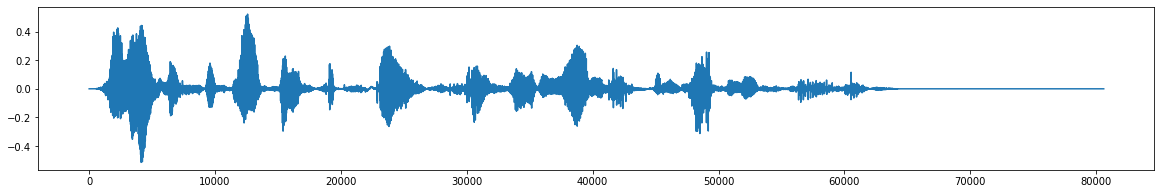

In [ ]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(generated_wav)

In [ ]:
reduced_noise = nr.reduce_noise(y = generated_wav, sr=synthesizer.sample_rate, n_std_thresh_stationary=1,stationary=True)

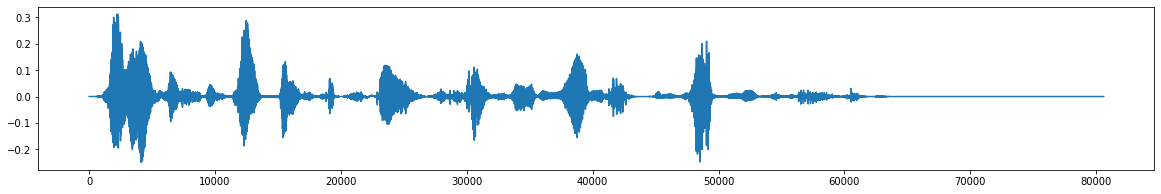

In [ ]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(reduced_noise )

In [ ]:
IPython.display.Audio(data=reduced_noise , rate=synthesizer.sample_rate)

NameError: ignored

In [ ]:
#Trump_Voice
IPython.display.Audio(data=reduced_noise , rate=synthesizer.sample_rate)

In [ ]:
pip install tensorboard== 1.15.0

ERROR: Could not find a version that satisfies the requirement tensorboard== (from versions: 1.6.0rc0, 1.6.0, 1.7.0, 1.8.0, 1.9.0, 1.10.0, 1.11.0, 1.12.0, 1.12.1, 1.12.2, 1.13.0, 1.13.1, 1.14.0, 1.15.0, 2.0.0, 2.0.1, 2.0.2, 2.1.0, 2.1.1, 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.4.0, 2.4.1, 2.5.0, 2.6.0, 2.7.0, 2.8.0)
ERROR: No matching distribution found for tensorboard==


In [ ]:
pip install tensorflow==1.15

     |████████████████████████████████| 412.3 MB 27 kB/s 
     |████████████████████████████████| 503 kB 37.8 MB/s 
     |████████████████████████████████| 3.8 MB 30.7 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=07408a1fc6a2076cae7a8fe6de284eef7c5bdc9ca4e4a642ca77003563310fb2
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 1.14.0
    Uninstalling tensorflow-estimator-1.14.0:
      Successfully uninstalled tensorflow-estimator-1.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 1.14.0
    Uninstalling tensorboard-1.14.0:
      Successfully uninstalled tensorboard-1.14.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninsta